# Introduction to Basic Customer Segmentation in Python

```{admonition} Problem

Exercise: Expedia Hotel Booking Dataset Customer Segmentation

Read more at [kaggle](https://www.kaggle.com/c/expedia-hotel-recommendations/data)

CEO : My board meeting is coming up next week. I need to present :-

- A report of underperforming and overperforming segments
- How to tailor the new marketing campaigns for different cities next month?
- How to improve the user booking rate?

```

## Imports

In [213]:
# import pandas as pd
# import numpy as np
# import scipy as sp
# import seaborn as sns
# import matplotlib as mpl
# import matplotlib.pyplot as plt

from fastai.basics import *
from nlphero.data.external import *
import sklearn as sk
import bqplot as bq
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy import stats
from ipywidgets import interact, interactive

## Read The Data 

In [2]:
# kaggle competitions download -c expedia-hotel-recommendations
path = untar_data("kaggle_competitions::expedia-hotel-recommendations"); path

Path('/Landmark2/pdo/.nlphero/data/expedia-hotel-recommendations')

In [3]:
path.ls()

(#4) [Path('/Landmark2/pdo/.nlphero/data/expedia-hotel-recommendations/sample_submission.csv'),Path('/Landmark2/pdo/.nlphero/data/expedia-hotel-recommendations/test.csv'),Path('/Landmark2/pdo/.nlphero/data/expedia-hotel-recommendations/train.csv'),Path('/Landmark2/pdo/.nlphero/data/expedia-hotel-recommendations/destinations.csv')]

In [4]:
df_train = pd.read_csv(path/"train.csv", parse_dates=['date_time', 'srch_ci', 'srch_co']); df_train.head()

date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 07:46:59          2               3                     66   
1 2014-08-11 08:22:12          2               3                     66   
2 2014-08-11 08:24:33          2               3                     66   
3 2014-08-09 18:05:16          2               3                     66   
4 2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0       12          0           1  ...                  0           1   
1       12          0           1  ...                  0           1   
2       12          0           0  ...                  0           1   
3       93          0           0  ...                  0           1   
4       93          0           0  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0                8250                         1           0    3   
1                8250                         1           1    1   
2                8250                         1           0    1   
3               14984                         1           0    1   
4               14984                         1           0    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           628              1  
1                2             50           628              1  
2                2             50           628              1  
3                2             50          1457             80  
4                2             50          1457             21  

[5 rows x 24 columns]

## Basic Data Exploration

In [5]:
df_train.head().T

0                    1  \
date_time                  2014-08-11 07:46:59  2014-08-11 08:22:12   
site_name                                    2                    2   
posa_continent                               3                    3   
user_location_country                       66                   66   
user_location_region                       348                  348   
user_location_city                       48862                48862   
orig_destination_distance              2234.26              2234.26   
user_id                                     12                   12   
is_mobile                                    0                    0   
is_package                                   1                    1   
channel                                      9                    9   
srch_ci                             2014-08-27           2014-08-29   
srch_co                             2014-08-31           2014-09-02   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8250                 8250   
srch_destination_type_id                     1                    1   
is_booking                                   0                    1   
cnt                                          3                    1   
hotel_continent                              2                    2   
hotel_country                               50                   50   
hotel_market                               628                  628   
hotel_cluster                                1                    1   

                                             2                    3  \
date_time                  2014-08-11 08:24:33  2014-08-09 18:05:16   
site_name                                    2                    2   
posa_continent                               3                    3   
user_location_country                       66                   66   
user_location_region                       348                  442   
user_location_city                       48862                35390   
orig_destination_distance              2234.26              913.193   
user_id                                     12                   93   
is_mobile                                    0                    0   
is_package                                   0                    0   
channel                                      9                    3   
srch_ci                             2014-08-29           2014-11-23   
srch_co                             2014-09-02           2014-11-28   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8250                14984   
srch_destination_type_id                     1                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              2                    2   
hotel_country                               50                   50   
hotel_market                               628                 1457   
hotel_cluster                                1                   80   

                                             4  
date_time                  2014-08-09 18:08:18  
site_name                                    2  
posa_continent                               3  
user_location_country                       66  
user_location_region                       442  
user_location_city                       35390  
orig_destination_distance              913.626  
user_id                                     93  
is_mobile                                    0  
is_

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64  

In [7]:
!ls -la {path}

total 4414434
drwxrwxrwx+  2 ubuntu ubuntu          0 Oct 25 08:38 .
drwxrwxrwx+ 18 ubuntu ubuntu          0 Oct 25 08:38 ..
-rwxrwxrwx+  1 ubuntu ubuntu  138159416 Oct 25 08:38 destinations.csv
-rwxrwxrwx+  1 ubuntu ubuntu   31756066 Oct 25 08:38 sample_submission.csv
-rwxrwxrwx+  1 ubuntu ubuntu  276554476 Oct 25 08:38 test.csv
-rwxrwxrwx+  1 ubuntu ubuntu 4070445781 Oct 25 08:40 train.csv


In [20]:
len(df_train)

37670293

In [8]:
# df_train.describe()

```{warning}

Focus of this exersize is to learn about customer segmentation. We will start with a sample and come back to full dataset after formulating a methodology

```

## Read Sample

In [121]:
df_sample = pd.read_csv("https://raw.githubusercontent.com/maoting1223/pycon_sg_2016/master/sample", parse_dates=['date_time', 'srch_ci', 'srch_co'], index_col=0)

In [122]:
df_sample.head().T

24636210             19837144  \
date_time                  2014-11-03 16:02:28  2013-03-13 19:25:01   
site_name                                   24                   11   
posa_continent                               2                    3   
user_location_country                       77                  205   
user_location_region                       871                  135   
user_location_city                       36643                38749   
orig_destination_distance              456.115              232.474   
user_id                                 792280               961995   
is_mobile                                    0                    0   
is_package                                   1                    0   
channel                                      1                    9   
srch_ci                    2014-12-15 00:00:00  2013-03-13 00:00:00   
srch_co                    2014-12-19 00:00:00  2013-03-14 00:00:00   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8286                 1842   
srch_destination_type_id                     1                    3   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              0                    2   
hotel_country                               63                  198   
hotel_market                              1258                  786   
hotel_cluster                               68                   37   

                                      13066459             4691082   \
date_time                  2014-10-13 13:20:25  2013-11-05 10:40:34   
site_name                                    2                   11   
posa_continent                               3                    3   
user_location_country                       66                  205   
user_location_region                       314                  411   
user_location_city                       48562                52752   
orig_destination_distance              4468.27              171.602   
user_id                                 495669               106611   
is_mobile                                    0                    0   
is_package                                   1                    0   
channel                                      9                    0   
srch_ci                    2015-04-03 00:00:00  2013-11-07 00:00:00   
srch_co                    2015-04-10 00:00:00  2013-11-08 00:00:00   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8746                 6210   
srch_destination_type_id                     1                    3   
is_booking                                   0                    1   
cnt                                          1                    1   
hotel_continent                              6                    2   
hotel_country                              105                  198   
hotel_market                                29                 1234   
hotel_cluster                               22                   42   

                                      4878884   
date_time                  2014-06-10 13:34:56  
site_name                                    2  
posa_continent                               3  
user_location_country                       66  
user_location_region                       174  
user_location_city                       50644  
orig_destination_distance                  NaN  
user_id                                 596177  
is_mobile                                    

## EDA-Descriptive Statistics

### Basics

In [123]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 24636210 to 1792721
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  63915 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    99878 non-null   

```{admonition} Attention
- Almost a third of `orig_destination_distance` is missing 
- Some rows are missing in srch_ci & srch_co. [~122]

```

In [124]:
df_sample.describe().T

count           mean            std      min  \
site_name                  100000.0       9.838570      11.996426   2.0000   
posa_continent             100000.0       2.678150       0.749018   0.0000   
user_location_country      100000.0      85.995070      59.292002   0.0000   
user_location_region       100000.0     308.636990     208.706581   0.0000   
user_location_city         100000.0   27676.391240   16768.647409   0.0000   
orig_destination_distance   63915.0    1960.661721    2228.153377   0.0056   
user_id                    100000.0  605438.332130  351615.377136  14.0000   
is_mobile                  100000.0       0.133770       0.340407   0.0000   
is_package                 100000.0       0.248140       0.431936   0.0000   
channel                    100000.0       5.858590       3.722823   0.0000   
srch_adults_cnt            100000.0       2.020710       0.909774   0.0000   
srch_children_cnt          100000.0       0.336750       0.734449   0.0000   
srch_rm_cnt                100000.0       1.111750       0.451602   0.0000   
srch_destination_id        100000.0   14426.327380   11036.981220   4.0000   
srch_destination_type_id   100000.0       2.577290       2.149263   1.0000   
is_booking                 100000.0       0.079930       0.271186   0.0000   
cnt                        100000.0       1.487980       1.280262   1.0000   
hotel_continent            100000.0       3.150920       1.620534   0.0000   
hotel_country              100000.0      81.093290      56.111519   0.0000   
hotel_market               100000.0     598.848330     510.959297   0.0000   
hotel_cluster              100000.0      49.860370      28.885423   0.0000   

                                   25%          50%           75%  \
site_name                       2.0000       2.0000      15.00000   
posa_continent                  3.0000       3.0000       3.00000   
user_location_country          66.0000      66.0000      70.00000   
user_location_region          174.0000     314.0000     385.00000   
user_location_city          12949.0000   27655.0000   42328.00000   
orig_destination_distance     312.7921    1131.8353    2542.35935   
user_id                    298796.2500  602882.5000  915722.25000   
is_mobile                       0.0000       0.0000       0.00000   
is_package                      0.0000       0.0000       0.00000   
channel                         2.0000       9.0000       9.00000   
srch_adults_cnt                 2.0000       2.0000       2.00000   
srch_children_cnt               0.0000       0.0000       0.00000   
srch_rm_cnt                     1.0000       1.0000       1.00000   
srch_destination_id          8267.0000    9145.0000   18784.00000   
srch_destination_type_id        1.0000       1.0000       5.00000   
is_booking                      0.0000       0.0000       0.00000   
cnt                             1.0000       1.0000       2.00000   
hotel_continent                 2.0000       2.0000       4.00000   
hotel_country                  50.0000      50.0000     106.00000   
hotel_market                  158.0000     591.0000     701.00000   
hotel_cluster                  25.0000      49.0000      73.00000   

                                    max  
site_name                  5.300000e+01  
posa_continent             4.000000e+00  
user_location_country      2.390000e+02  
user_location_region       1.025000e+03  
user_location_city         5.650700e+04  
orig_destination_distance  1.196538e+04  
user_id                    1.198783e+06  
is_mobile                  1.000000e+00  
is_package                 1.000000e+00  
channel                    1.000000e+01  
srch_adults_cnt            9.000000e+00  
srch_children_cnt          9.000000e+00  
srch_rm_cnt                8.000000e+00  
srch_destination_id        6.503500e+04  
srch_destination_type_id   9.000000e+00  
is_booking                 1.000000e+00  
cnt                        1.200000e+02  
hotel_continent            6.000000e+0

In [125]:
df_sample['user_location_region'].nunique()

779

In [126]:
df_sample['user_location_city'].nunique()

10779

In [127]:
df_sample['date_time'].min(), df_sample['date_time'].max()

(Timestamp('2013-01-07 00:33:47'), Timestamp('2014-12-31 23:47:14'))

In [128]:
df_sample['srch_ci'].min(), df_sample['srch_ci'].max()

(Timestamp('2013-01-07 00:00:00'), Timestamp('2016-05-10 00:00:00'))

In [129]:
df_sample['srch_co'].min(), df_sample['srch_co'].max()

(Timestamp('2013-01-08 00:00:00'), Timestamp('2016-05-13 00:00:00'))

In [130]:
df_sample.nunique()

date_time                    99886
site_name                       41
posa_continent                   5
user_location_country          201
user_location_region           779
user_location_city           10779
orig_destination_distance    62206
user_id                      88863
is_mobile                        2
is_package                       2
channel                         11
srch_ci                       1066
srch_co                       1068
srch_adults_cnt                 10
srch_children_cnt               10
srch_rm_cnt                      9
srch_destination_id           8827
srch_destination_type_id         8
is_booking                       2
cnt                             32
hotel_continent                  7
hotel_country                  178
hotel_market                  1843
hotel_cluster                  100
dtype: int64

### Correlation

 Correlation between booking and hotel room

In [131]:
pd.crosstab(df_sample['is_booking'], df_sample['srch_rm_cnt'])

srch_rm_cnt  0      1     2    3    4    5   6   7   8
is_booking                                            
0            0  84425  6091  975  253  108  61  29  65
1            1   7248   580  102   42    9   6   1   4

In [132]:
df_sample.groupby('srch_rm_cnt')['is_booking'].mean()

srch_rm_cnt
0    1.000000
1    0.079064
2    0.086943
3    0.094708
4    0.142373
5    0.076923
6    0.089552
7    0.033333
8    0.057971
Name: is_booking, dtype: float64

In [133]:
df_sample.groupby('srch_rm_cnt')['is_booking'].value_counts()

srch_rm_cnt  is_booking
0            1                 1
1            0             84425
             1              7248
2            0              6091
             1               580
3            0               975
             1               102
4            0               253
             1                42
5            0               108
             1                 9
6            0                61
             1                 6
7            0                29
             1                 1
8            0                65
             1                 4
Name: is_booking, dtype: int64

In [134]:
df_sample.groupby('srch_rm_cnt')['is_booking'].mean()

srch_rm_cnt
0    1.000000
1    0.079064
2    0.086943
3    0.094708
4    0.142373
5    0.076923
6    0.089552
7    0.033333
8    0.057971
Name: is_booking, dtype: float64

In [135]:
df_sample.corr()

site_name  posa_continent  user_location_country  \
site_name                   1.000000       -0.637743               0.159283   
posa_continent             -0.637743        1.000000               0.179726   
user_location_country       0.159283        0.179726               1.000000   
user_location_region        0.130818       -0.034647               0.058496   
user_location_city         -0.013471        0.039227               0.122686   
orig_destination_distance   0.027609        0.049808               0.047689   
user_id                     0.030404       -0.015209              -0.021091   
is_mobile                  -0.005418        0.016331               0.003728   
is_package                  0.048820       -0.093459              -0.025284   
channel                    -0.027780        0.089680               0.109999   
srch_adults_cnt            -0.013405        0.012350               0.042526   
srch_children_cnt          -0.031962        0.034453               0.037101   
srch_rm_cnt                 0.016585       -0.033712               0.000858   
srch_destination_id         0.034895       -0.015535               0.013486   
srch_destination_type_id   -0.006934        0.037172               0.028888   
is_booking                 -0.013460        0.013319               0.001284   
cnt                         0.022274       -0.018952               0.003539   
hotel_continent             0.201760       -0.333578              -0.063744   
hotel_country               0.263167       -0.156578               0.097624   
hotel_market               -0.068316        0.049214               0.015569   
hotel_cluster              -0.026689        0.018297              -0.011876   

                           user_location_region  user_location_city  \
site_name                              0.130818           -0.013471   
posa_continent                        -0.034647            0.039227   
user_location_country                  0.058496            0.122686   
user_location_region                   1.000000            0.132457   
user_location_city                     0.132457            1.000000   
orig_destination_distance              0.136560            0.014178   
user_id                                0.002225           -0.007989   
is_mobile                              0.016982           -0.003741   
is_package                             0.040482            0.013032   
channel                               -0.001600            0.023497   
srch_adults_cnt                        0.005487            0.006628   
srch_children_cnt                      0.014009            0.002638   
srch_rm_cnt                            0.000254           -0.000694   
srch_destination_id                    0.022567            0.000786   
srch_destination_type_id               0.001376           -0.004399   
is_booking                             0.000253           -0.002655   
cnt                                   -0.007570           -0.002175   
hotel_continent                        0.043027            0.007759   
hotel_country                         -0.050301           -0.001987   
hotel_market                           0.040367            0.008558   
hotel_cluster                          0.004984            0.000102   

                           orig_destination_distance   user_id  is_mobile  \
site_name                                   0.027609  0.030404  -0.005418   
posa_continent                              0.049808 -0.015209   0.016331   
user_location_country                       0.047689 -0.021091   0.003728   
user_location_region                        0.136560  0.002225   0.016982   
user_location_city                          0.014178 -0.007989  -0.003741   
orig_destination_distance                   1.000000  0.017015  -0.059464   
user_id                                     0.017015  1.000000  -0.011439   
is_mobile                                  -0.059464 -0.011439   1.000000   
is_package                      

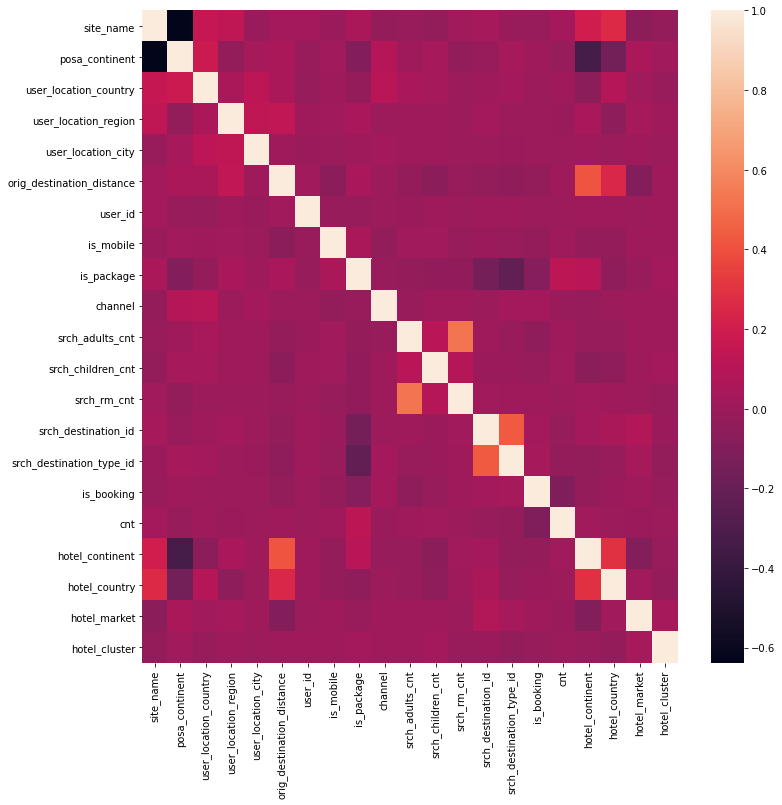

In [136]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_sample.corr(),ax =ax)
plt.show()

In [137]:
df_sample['srch_children_cnt'].corr(df_sample['is_booking'])

-0.023228499097508428

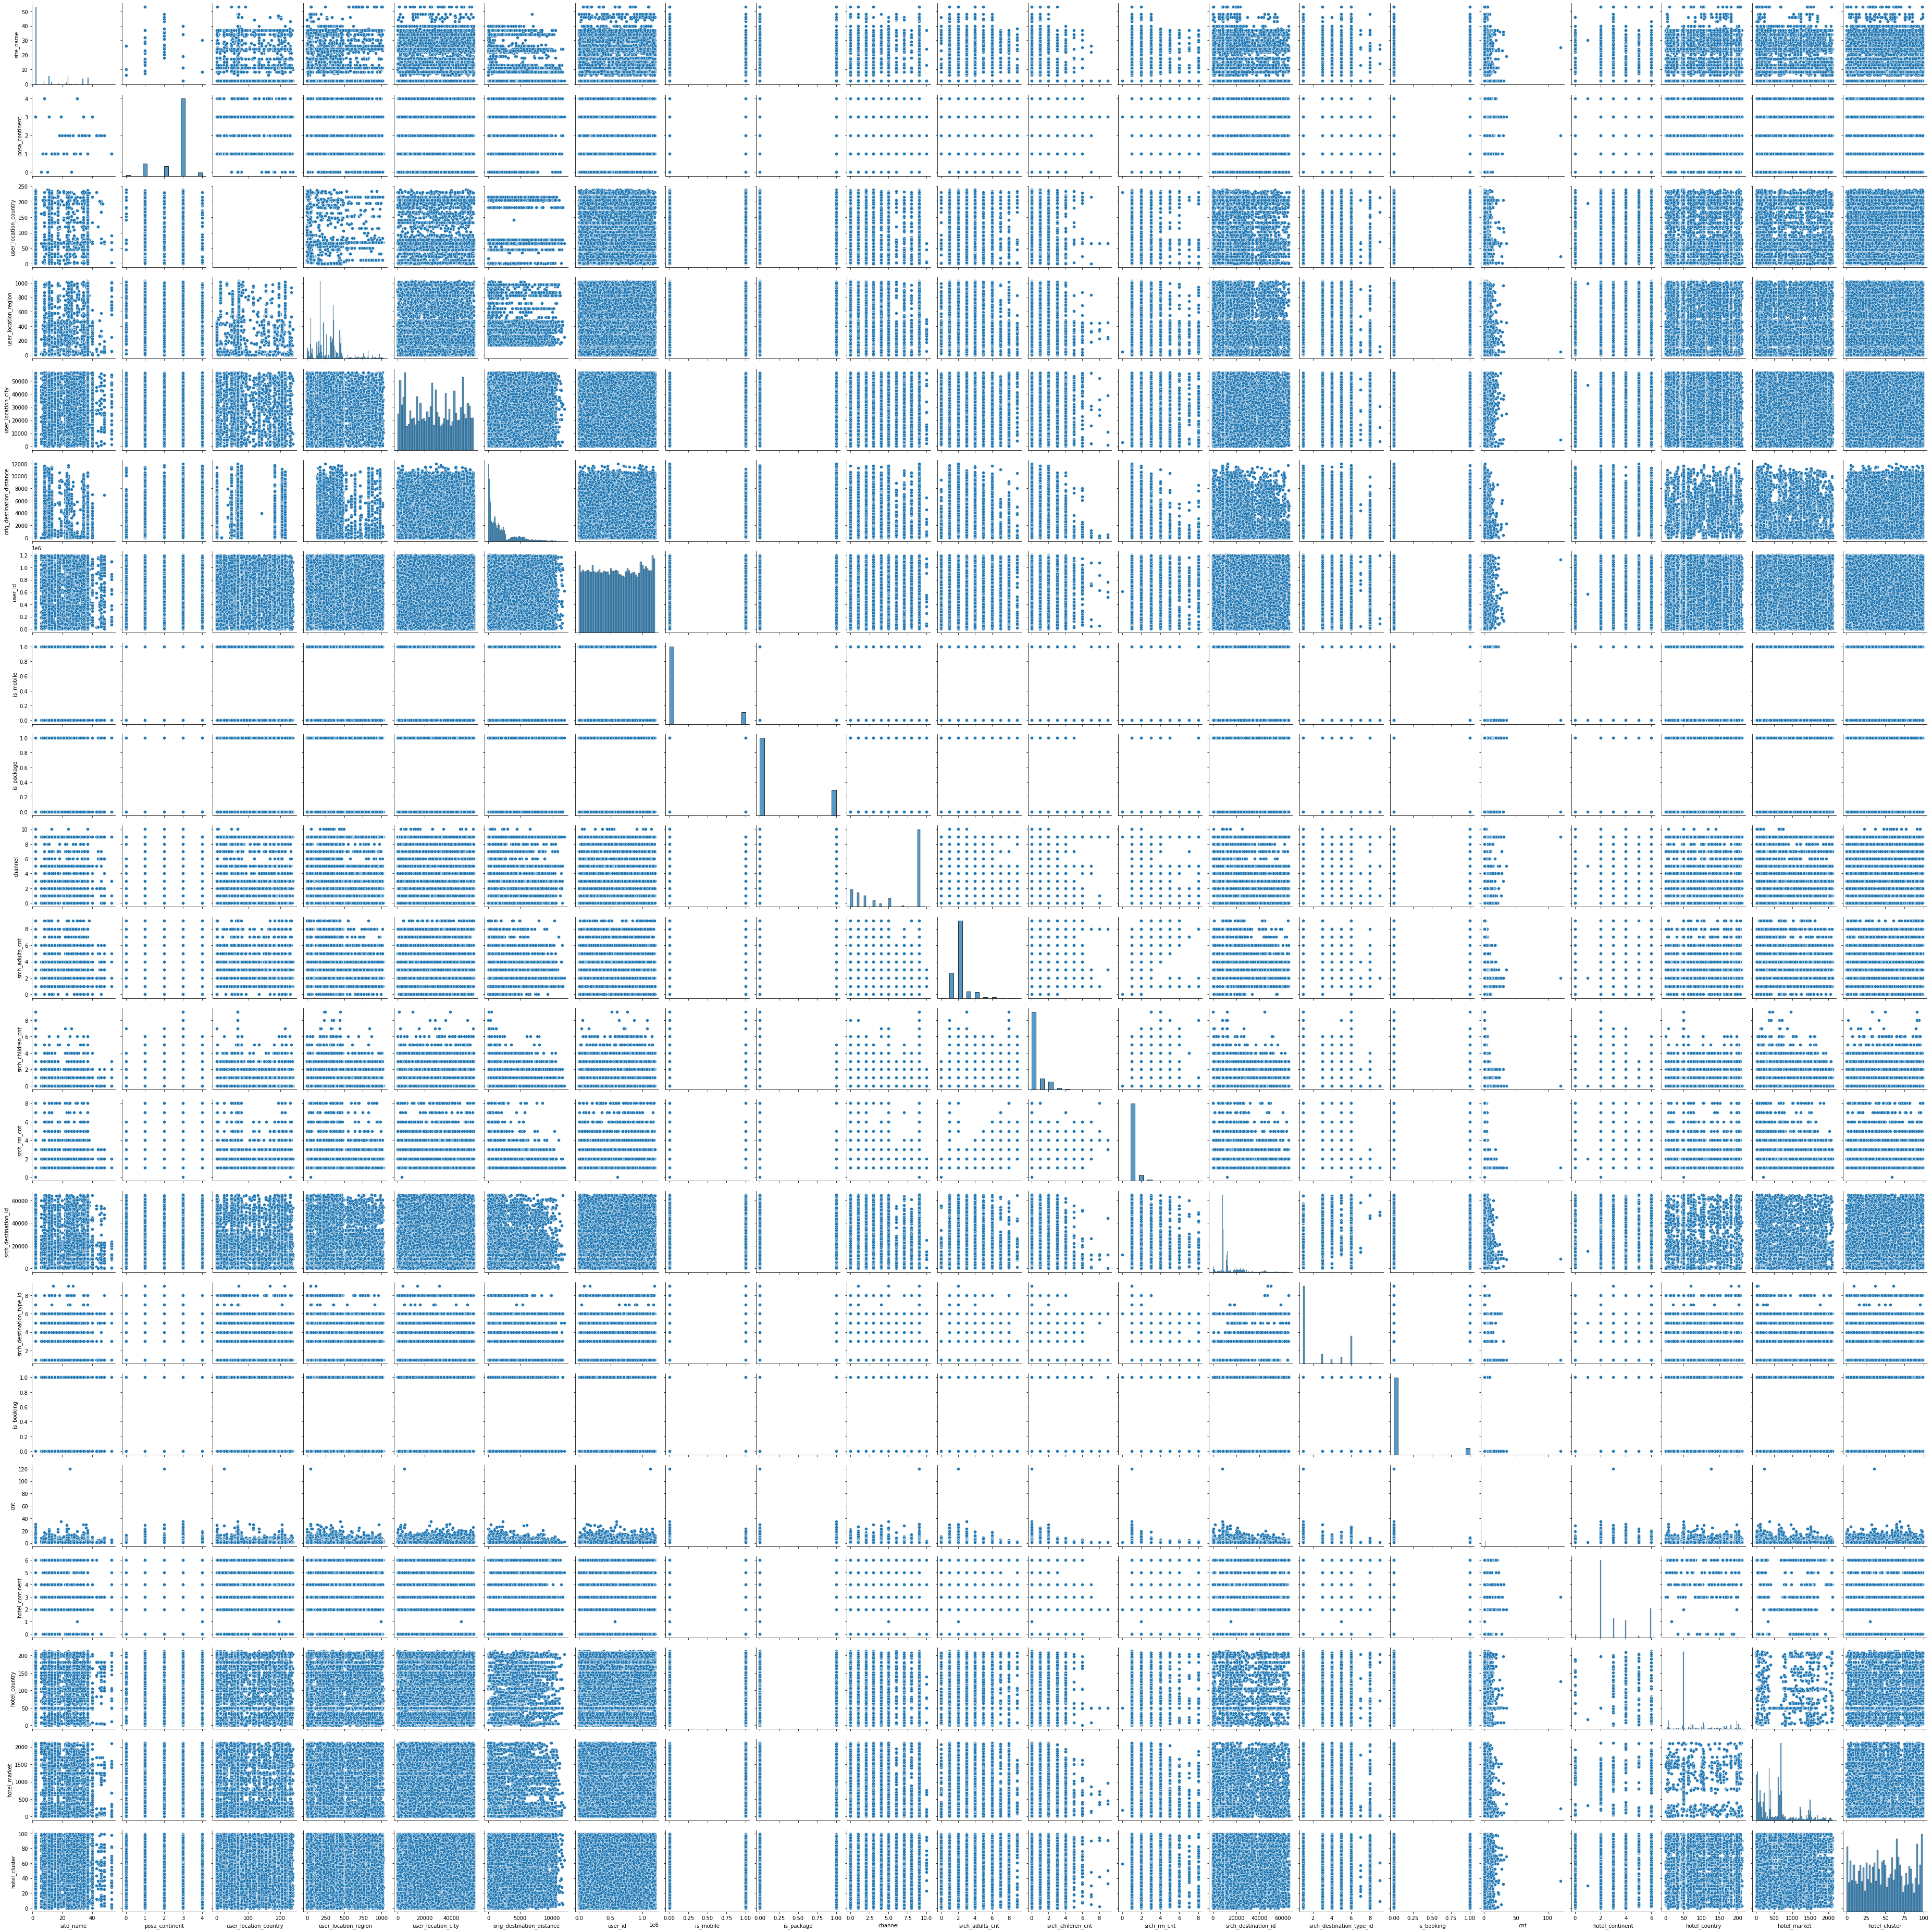

In [53]:
sns.pairplot(df_sample)

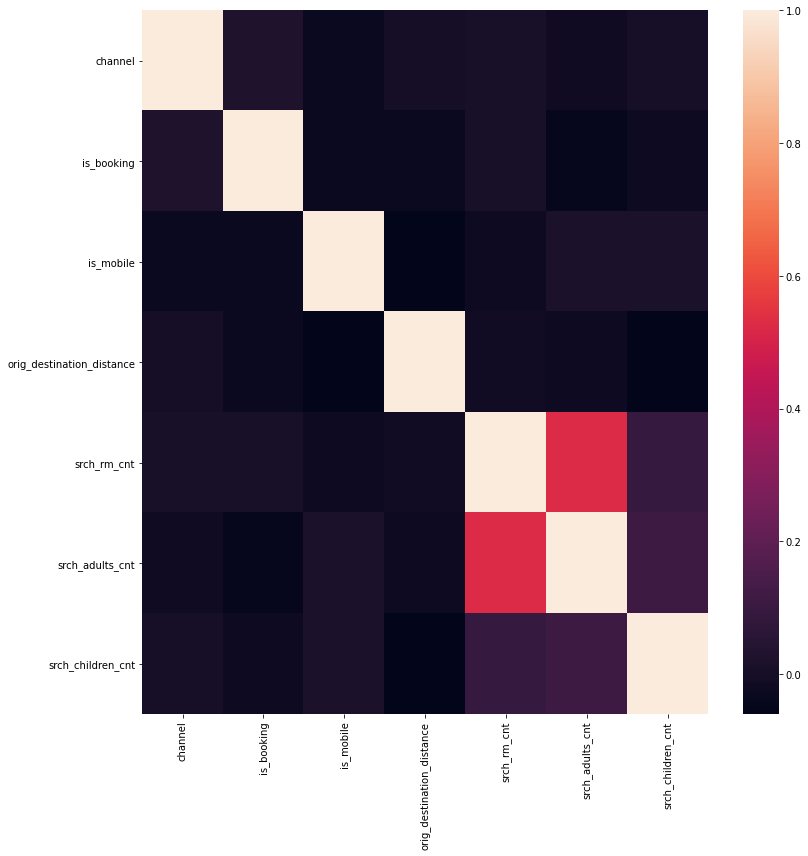

In [138]:
selection = ['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12)); axes
ax1 = axes
sns.heatmap(df_sample[selection].corr(),ax =ax1)
plt.tight_layout()
plt.show()

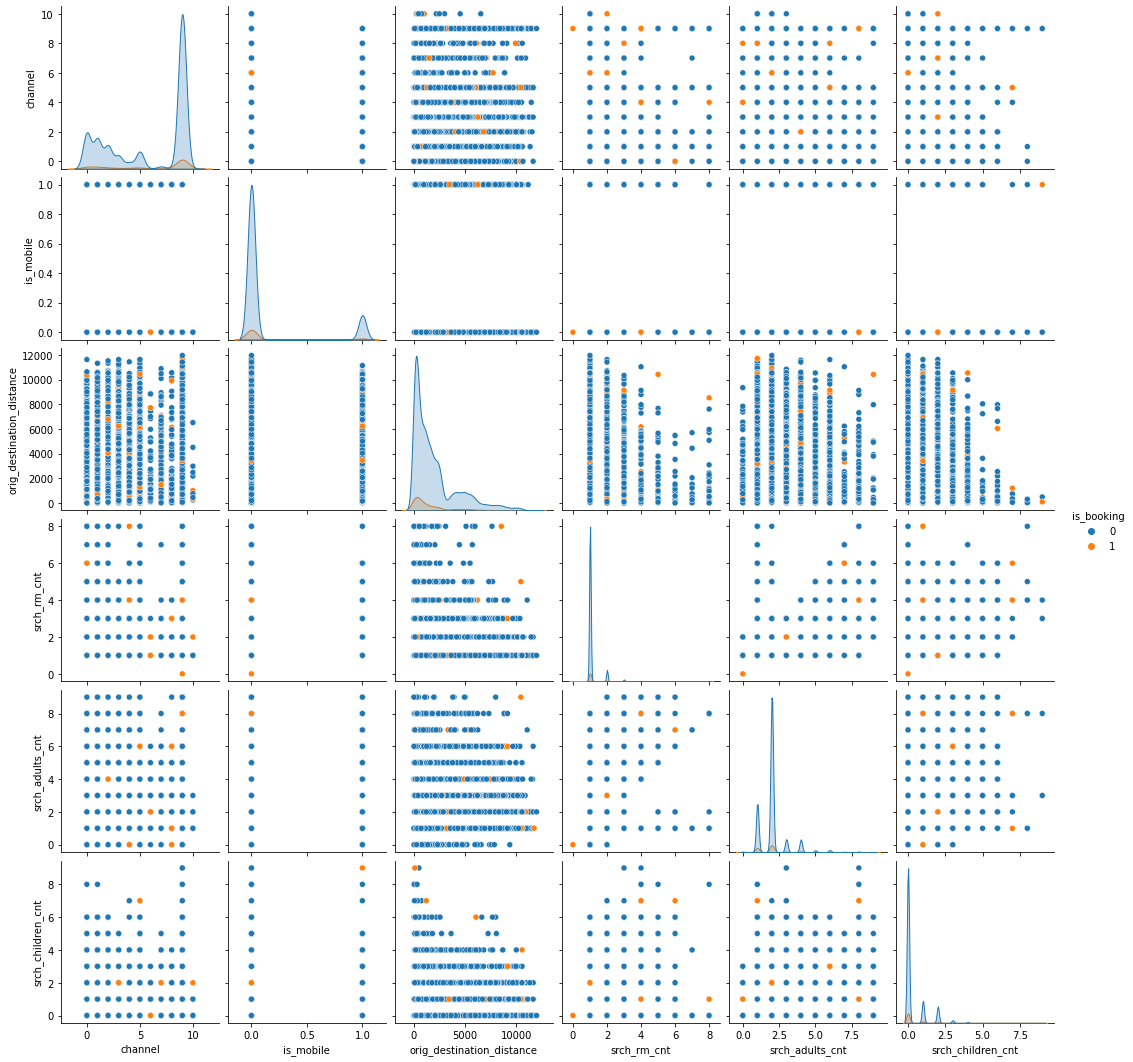

In [78]:
sns.pairplot(df_sample[selection], hue="is_booking", height=2.5)


<ipython-input-73-88919a001020>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_sample[selection].hist(ax=fig.gca())


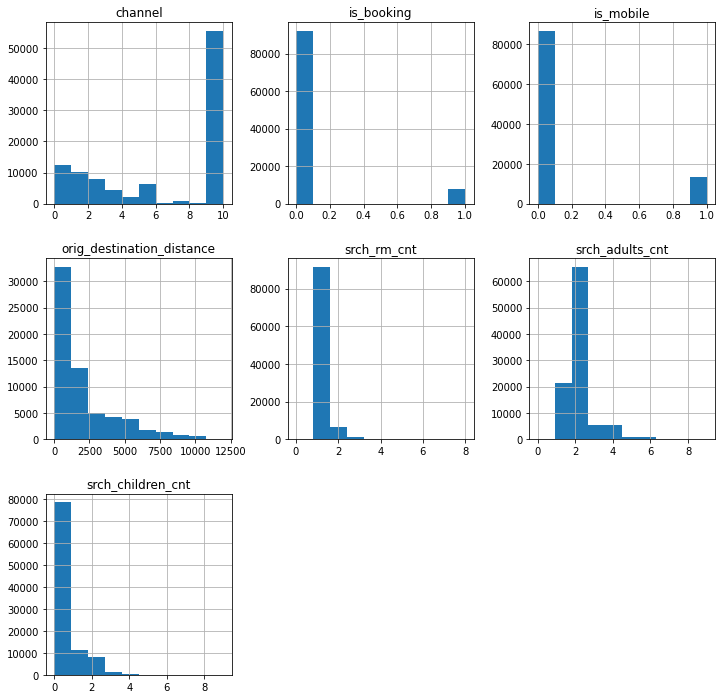

In [73]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
df_sample[selection].hist(ax=fig.gca())
plt.show()

In [81]:
# sns.kdeplot(df_sample[selection])

### Distribution of number of Booking Attempts

In [139]:
df_userbooking = df_sample.groupby('user_id')['is_booking']\
.agg(number_of_booking='count').reset_index()
df_userbooking

user_id  number_of_booking
0           14                  1
1           38                  1
2           40                  1
3          156                  2
4          160                  1
...        ...                ...
88858  1198722                  1
88859  1198742                  1
88860  1198748                  1
88861  1198776                  1
88862  1198783                  2

[88863 rows x 2 columns]

In [140]:
df_sample = df_sample.merge(df_userbooking)
df_sample.head().T

0                    1  \
date_time                  2014-11-03 16:02:28  2014-07-28 23:50:54   
site_name                                   24                   24   
posa_continent                               2                    2   
user_location_country                       77                   77   
user_location_region                       871                  871   
user_location_city                       36643                36643   
orig_destination_distance              456.115              454.461   
user_id                                 792280               792280   
is_mobile                                    0                    0   
is_package                                   1                    1   
channel                                      1                    9   
srch_ci                    2014-12-15 00:00:00  2014-08-26 00:00:00   
srch_co                    2014-12-19 00:00:00  2014-08-31 00:00:00   
srch_adults_cnt                              2                    1   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8286                 8286   
srch_destination_type_id                     1                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              0                    0   
hotel_country                               63                   63   
hotel_market                              1258                 1258   
hotel_cluster                               68                   14   
number_of_booking                            2                    2   

                                             2                    3  \
date_time                  2013-03-13 19:25:01  2014-10-13 13:20:25   
site_name                                   11                    2   
posa_continent                               3                    3   
user_location_country                      205                   66   
user_location_region                       135                  314   
user_location_city                       38749                48562   
orig_destination_distance              232.474              4468.27   
user_id                                 961995               495669   
is_mobile                                    0                    0   
is_package                                   0                    1   
channel                                      9                    9   
srch_ci                    2013-03-13 00:00:00  2015-04-03 00:00:00   
srch_co                    2013-03-14 00:00:00  2015-04-10 00:00:00   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       1842                 8746   
srch_destination_type_id                     3                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              2                    6   
hotel_country                              198                  105   
hotel_market                               786                   29   
hotel_cluster                               37                   22   
number_of_booking                            1                    1   

                                             4  
date_time                  2013-11-05 10:40:34  
site_name                                   11  
posa_continent                               3  
user_location_country                      205  
user_location_region                       411  
user_location_city                       52752  
orig_des

In [141]:
df_sample.groupby('user_id')['is_booking']\
.agg(['mean']).reset_index()\
.groupby('mean')['user_id']\
.agg('count')

mean
0.000000    80991
0.200000        5
0.250000       35
0.333333      153
0.400000        1
0.500000     1054
0.600000        1
0.666667       26
0.750000        1
1.000000     6596
Name: user_id, dtype: int64

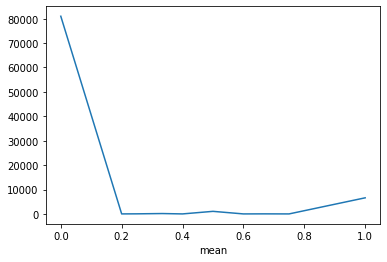

In [142]:
(df_sample.groupby('user_id')['is_booking']\
.agg(['mean']).reset_index()\
.groupby('mean')['user_id']\
.agg('count')).plot(x='mean', y='user_id')
plt.show()

## EDA-Business Rules Validation

### Remove columns with zero occupant

In [143]:
pd.crosstab(df_sample['srch_adults_cnt'], df_sample['srch_children_cnt'])

srch_children_cnt      0     1     2    3    4   5  6  7  8  9
srch_adults_cnt                                               
0                    174     2     3    2    0   0  0  0  0  0
1                  18749  2137   523  117   11   1  9  1  2  0
2                  50736  7093  6529  972  208  14  7  1  0  0
3                   3645  1131   469  131   27   5  2  2  0  2
4                   3933   690   494   77   83   9  4  0  0  0
5                    535   131    41   20    6   4  2  0  0  0
6                    669    73    53   28   18  13  7  0  0  0
7                     99    20     5    8    6   3  0  0  0  0
8                    183    12    13    2    6   1  3  2  2  1
9                     24     5     4    2    1   1  2  0  0  0

In [144]:
(df_sample['srch_adults_cnt']+df_sample['srch_children_cnt']) == 0

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [145]:
df_sample = df_sample[(df_sample['srch_adults_cnt']+df_sample['srch_children_cnt']) > 0]

df_sample

date_time  site_name  posa_continent  user_location_country  \
0     2014-11-03 16:02:28         24               2                     77   
1     2014-07-28 23:50:54         24               2                     77   
2     2013-03-13 19:25:01         11               3                    205   
3     2014-10-13 13:20:25          2               3                     66   
4     2013-11-05 10:40:34         11               3                    205   
...                   ...        ...             ...                    ...   
99995 2013-03-31 16:45:01          2               3                     66   
99996 2013-09-29 14:09:07          2               3                     66   
99997 2014-07-11 22:05:54         37               1                     69   
99998 2013-07-02 01:03:12          2               3                     66   
99999 2014-12-19 19:59:12         11               3                    205   

       user_location_region  user_location_city  orig_destination_distance  \
0                       871               36643                   456.1151   
1                       871               36643                   454.4611   
2                       135               38749                   232.4737   
3                       314               48562                  4468.2720   
4                       411               52752                   171.6021   
...                     ...                 ...                        ...   
99995                   351               21609                  1386.4061   
99996                   462               49272                   698.1395   
99997                   998               52849                        NaN   
99998                   246               28491                   207.2549   
99999                   354               53478                  1198.4359   

       user_id  is_mobile  is_package  ...  srch_rm_cnt srch_destination_id  \
0       792280          0           1  ...            1                8286   
1       792280          0           1  ...            1                8286   
2       961995          0           0  ...            1                1842   
3       495669          0           1  ...            1                8746   
4       106611          0           0  ...            1                6210   
...        ...        ...         ...  ...          ...                 ...   
99995   858268          0           0  ...            1                 762   
99996   957708          0           0  ...            1               12843   
99997   814512          1           1  ...            3               18773   
99998   881704          0           1  ...            1                8859   
99999   845482          0           0  ...            1               11848   

      srch_destination_type_id  is_booking  cnt  hotel_continent  \
0                            1           0    1                0   
1                            1           0    1                0   
2                            3           0    1                2   
3                            1           0    1                6   
4                            3           1    1                2   
...                        ...         ...  ...              ...   
99995                        6           0    1                2   
99996                        5           0    1                2   
99997                        1           0    1                6   
99998                        1           0    1                2   
99999                        1           0    1                2   

       hotel_country  hotel_market  hotel_cluster  number_of_booking  
0                 63          1258             68                  2  
1                 63          1258             14                  2  
2                198           786             37                  1  
3                105            29             22                  1  
4        

### Create a date column

In [146]:
df_sample.loc[:,'date'] =df_sample['date_time'].dt.date

In [147]:
df_sample.head().T

0                    1  \
date_time                  2014-11-03 16:02:28  2014-07-28 23:50:54   
site_name                                   24                   24   
posa_continent                               2                    2   
user_location_country                       77                   77   
user_location_region                       871                  871   
user_location_city                       36643                36643   
orig_destination_distance              456.115              454.461   
user_id                                 792280               792280   
is_mobile                                    0                    0   
is_package                                   1                    1   
channel                                      1                    9   
srch_ci                    2014-12-15 00:00:00  2014-08-26 00:00:00   
srch_co                    2014-12-19 00:00:00  2014-08-31 00:00:00   
srch_adults_cnt                              2                    1   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8286                 8286   
srch_destination_type_id                     1                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              0                    0   
hotel_country                               63                   63   
hotel_market                              1258                 1258   
hotel_cluster                               68                   14   
number_of_booking                            2                    2   
date                                2014-11-03           2014-07-28   

                                             2                    3  \
date_time                  2013-03-13 19:25:01  2014-10-13 13:20:25   
site_name                                   11                    2   
posa_continent                               3                    3   
user_location_country                      205                   66   
user_location_region                       135                  314   
user_location_city                       38749                48562   
orig_destination_distance              232.474              4468.27   
user_id                                 961995               495669   
is_mobile                                    0                    0   
is_package                                   0                    1   
channel                                      9                    9   
srch_ci                    2013-03-13 00:00:00  2015-04-03 00:00:00   
srch_co                    2013-03-14 00:00:00  2015-04-10 00:00:00   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       1842                 8746   
srch_destination_type_id                     3                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              2                    6   
hotel_country                              198                  105   
hotel_market                               786                   29   
hotel_cluster                               37                   22   
number_of_booking                            1                    1   
date                                2013-03-13           2014-10-13   

                                             4  
date_time                  2013-11-05 10:40:34  
site_name                                   11  
posa_continent                               3  
user_location

In [148]:
df_sample.shape

(99826, 26)

### Check booking date < check_in date < check out date

In [150]:
chk = df_sample[(df_sample['srch_ci']<df_sample['date']) |
          (df_sample['srch_co'] <df_sample['srch_ci'])]

In [151]:
chk.shape

(27, 26)

## EDA - Create New Features

In [153]:
# duration 

df_sample['duration'] = (df_sample['srch_co'] - df_sample['srch_ci'])/ np.timedelta64(1, "D")
df_sample['duration']

0        4.0
1        5.0
2        1.0
3        7.0
4        1.0
        ... 
99995    4.0
99996    1.0
99997    7.0
99998    2.0
99999    3.0
Name: duration, Length: 99826, dtype: float64

In [155]:
df_sample.loc[df_sample['duration'] < 0, 'duration'] = np.nan

In [159]:
df_sample['days_in_advance'] = (df_sample['srch_ci'] - df_sample['date_time'])/  np.timedelta64(1, "D")
df_sample.loc[df_sample['days_in_advance'] < 0, 'days_in_advance'] = np.nan
df_sample.head().T

0                    1  \
date_time                  2014-11-03 16:02:28  2014-07-28 23:50:54   
site_name                                   24                   24   
posa_continent                               2                    2   
user_location_country                       77                   77   
user_location_region                       871                  871   
user_location_city                       36643                36643   
orig_destination_distance              456.115              454.461   
user_id                                 792280               792280   
is_mobile                                    0                    0   
is_package                                   1                    1   
channel                                      1                    9   
srch_ci                    2014-12-15 00:00:00  2014-08-26 00:00:00   
srch_co                    2014-12-19 00:00:00  2014-08-31 00:00:00   
srch_adults_cnt                              2                    1   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       8286                 8286   
srch_destination_type_id                     1                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              0                    0   
hotel_country                               63                   63   
hotel_market                              1258                 1258   
hotel_cluster                               68                   14   
number_of_booking                            2                    2   
date                                2014-11-03           2014-07-28   
duration                                     4                    5   
days_in_advance                        41.3316              28.0063   

                                             2                    3  \
date_time                  2013-03-13 19:25:01  2014-10-13 13:20:25   
site_name                                   11                    2   
posa_continent                               3                    3   
user_location_country                      205                   66   
user_location_region                       135                  314   
user_location_city                       38749                48562   
orig_destination_distance              232.474              4468.27   
user_id                                 961995               495669   
is_mobile                                    0                    0   
is_package                                   0                    1   
channel                                      9                    9   
srch_ci                    2013-03-13 00:00:00  2015-04-03 00:00:00   
srch_co                    2013-03-14 00:00:00  2015-04-10 00:00:00   
srch_adults_cnt                              2                    2   
srch_children_cnt                            0                    0   
srch_rm_cnt                                  1                    1   
srch_destination_id                       1842                 8746   
srch_destination_type_id                     3                    1   
is_booking                                   0                    0   
cnt                                          1                    1   
hotel_continent                              2                    6   
hotel_country                              198                  105   
hotel_market                               786                   29   
hotel_cluster                               37                   22   
number_of_booking                            1                    1   
date                                2013-03-13           2014-10-13   
duration                                     1                    7 

## Underperforming and Overperforming Segments

### Effect Size and Comparing to Mean

Here we are taking `booking_rate` per segment as our effect size.

In [160]:
df_sample.channel.nunique()

11

In [161]:
df_sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'number_of_booking', 'date', 'duration',
       'days_in_advance'],
      dtype='object')

In [162]:
cat_list = ['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city','channel', 
       'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

In [166]:
df_sample.groupby('channel')['is_booking']\
.agg(booking_rate='mean', num_of_bookings='sum')\
.reset_index()\
.sort_values(by='booking_rate')

channel  booking_rate  num_of_bookings
7         7      0.043263               35
8         8      0.051852               14
3         3      0.060482              266
2         2      0.060583              474
6         6      0.068323               11
1         1      0.069568              713
0         0      0.072184              901
9         9      0.085365             4719
5         5      0.094533              581
4         4      0.120438              264
10       10      0.200000                3

In [173]:
@interact
def display_ranking(cat=cat_list):
    display(df_sample.groupby(cat)['is_booking']\
    .agg(booking_rate='mean', num_of_bookings='sum')\
    .reset_index()\
    .sort_values(by='booking_rate',  ascending=False))

interactive(children=(Dropdown(description='cat', options=('site_name', 'posa_continent', 'user_location_count…

In [175]:
## Population Booking Rate

df_sample['is_booking'].mean()

0.07994911145392984

```{note}

Looking at the data above we can see 4,5,9, 10 performing more than the population mean. However we need to ask the question are they really significant or just by chance?

```

### Two Sample T-Test

- Samples coming from 2 different group 
- Check each group for inference condition
    - Randomness
    - Independence
        n*p <= 10 
        n(1-p) <= 10 
    - Normal 
        - Sampled with Replacement
        - Sample size <= 10%N ( population)
- Assign a signifance and confidence level ( for calculaing z*)
- Calculate Confidence interval
    
    $CI = \hat{p}_1 - \hat{p}_1 \pm z^*\sqrt{ \frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+ \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}} $
    
- Calculate pvalue & t-test

In [177]:
df_sample.groupby('channel')['is_booking']\
    .agg(average='mean',
         bookings='count').reset_index()

channel   average  bookings
0         0  0.072184     12482
1         1  0.069568     10249
2         2  0.060583      7824
3         3  0.060482      4398
4         4  0.120438      2192
5         5  0.094533      6146
6         6  0.068323       161
7         7  0.043263       809
8         8  0.051852       270
9         9  0.085365     55280
10       10  0.200000        15

In [189]:
def stat_comparison(cat, df):
    cat =  df.groupby(cat)['is_booking']\
                    .agg(sub_average='mean',
                         sub_bookings='count')\
                    .reset_index()
    
    cat['overall_average'] = df['is_booking'].mean()
    cat['overall_bookings'] = df['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings']-cat['sub_bookings']
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average']- cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_bookings']+1/cat['rest_bookings']))
    
    cat['prob'] = np.around(stats.norm.cdf(cat['z_score']), decimals=10)
    
    
    def significant(x):
        if x >0.9:
            return 1
        elif x < 0.1:
            return -1
        else:
            return 0
        
    cat['significant'] = cat['prob'].apply(significant)
    return cat

In [186]:
stat_comparison('channel', df_sample)

channel  sub_average  sub_bookings  overall_average  overall_bookings  \
0         0     0.072184         12482         0.079949             99826   
1         1     0.069568         10249         0.079949             99826   
2         2     0.060583          7824         0.079949             99826   
3         3     0.060482          4398         0.079949             99826   
4         4     0.120438          2192         0.079949             99826   
5         5     0.094533          6146         0.079949             99826   
6         6     0.068323           161         0.079949             99826   
7         7     0.043263           809         0.079949             99826   
8         8     0.051852           270         0.079949             99826   
9         9     0.085365         55280         0.079949             99826   
10       10     0.200000            15         0.079949             99826   

    rest_bookings  rest_average   z_score          prob  significant  
0           87344      0.081059 -3.419680  3.134747e-04           -1  
1           89577      0.081137 -4.090773  2.149690e-05           -1  
2           92002      0.081596 -6.579173  0.000000e+00           -1  
3           95428      0.080846 -4.868548  5.621000e-07           -1  
4           97634      0.079040  7.067474  1.000000e+00            1  
5           93680      0.078992  4.351672  9.999932e-01            1  
6           99665      0.079968 -0.544360  2.930970e-01            0  
7           99017      0.080249 -3.863018  5.599740e-05           -1  
8           99556      0.080025 -1.704595  4.413499e-02           -1  
9           44546      0.073228  7.028968  1.000000e+00            1  
10          99811      0.079931  1.714474  9.567791e-01            1

In [190]:
@interact
def review_stats(cat=cat_list):
    return stat_comparison(cat, df_sample)

interactive(children=(Dropdown(description='cat', options=('site_name', 'posa_continent', 'user_location_count…

```{note}

From above we can find significantly affected channel / cities/ region
```

## Clustering - What are similar user cities?

### Step1. What are the features I am going to use? (that makes sense)

- What features may distinguish cities based on business sense and exploratory analysis

In [191]:
# Numerical Features
df_sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'number_of_booking', 'date', 'duration',
       'days_in_advance'],
      dtype='object')

In [194]:
num_list = ['orig_destination_distance',  'is_mobile', 'is_package',
       'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'duration',
       'days_in_advance']

city_data = df_sample[['user_location_city']+num_list].dropna(axis=0)
city_data

user_location_city  orig_destination_distance  is_mobile  is_package  \
0                   36643                   456.1151          0           1   
1                   36643                   454.4611          0           1   
3                   48562                  4468.2720          0           1   
4                   52752                   171.6021          0           0   
5                   54864                   209.6633          0           0   
...                   ...                        ...        ...         ...   
99993               36878                   368.5449          0           0   
99995               21609                  1386.4061          0           0   
99996               49272                   698.1395          0           0   
99998               28491                   207.2549          0           1   
99999               53478                  1198.4359          0           0   

       srch_adults_cnt  srch_children_cnt  srch_rm_cnt  duration  \
0                    2                  0            1       4.0   
1                    1                  0            1       5.0   
3                    2                  0            1       7.0   
4                    2                  0            1       1.0   
5                    1                  0            1       3.0   
...                ...                ...          ...       ...   
99993                1                  0            1       1.0   
99995                2                  0            1       4.0   
99996                1                  0            1       1.0   
99998                2                  0            1       2.0   
99999                2                  1            1       3.0   

       days_in_advance  
0            41.331620  
1            28.006319  
3           171.444155  
4             1.555162  
5             6.484433  
...                ...  
99993         9.359387  
99995        96.302072  
99996         0.410336  
99998        10.956111  
99999        11.167222  

[61554 rows x 9 columns]

In [197]:
city_groups = city_data.groupby('user_location_city')\
.mean().reset_index().dropna(); city_groups

user_location_city  orig_destination_distance  is_mobile  is_package  \
0                      0                2315.836250   0.000000    0.250000   
1                      3                3451.384159   0.058824    0.294118   
2                      7                5994.864000   0.000000    1.000000   
3                     14                5342.819100   0.000000    0.000000   
4                     21                2165.768900   0.000000    0.500000   
...                  ...                        ...        ...         ...   
4480               56472                1394.624100   0.214286    0.357143   
4481               56488                5930.875650   0.000000    0.000000   
4482               56498                3288.597750   0.500000    0.500000   
4483               56505                1370.771600   1.000000    0.000000   
4484               56507                1941.016580   0.400000    0.600000   

      srch_adults_cnt  srch_children_cnt  srch_rm_cnt   duration  \
0            1.750000           0.000000     1.000000   2.000000   
1            1.941176           0.470588     1.000000   4.294118   
2            2.000000           0.000000     1.000000  14.000000   
3            2.000000           0.750000     1.000000   7.000000   
4            1.500000           1.000000     1.000000   5.000000   
...               ...                ...          ...        ...   
4480         2.000000           0.285714     1.142857   3.285714   
4481         1.500000           0.000000     1.000000   6.000000   
4482         3.000000           1.000000     1.500000   4.500000   
4483         2.000000           0.000000     1.000000   2.000000   
4484         2.600000           0.400000     1.400000   5.000000   

      days_in_advance  
0           77.959358  
1           87.139739  
2           57.287755  
3           35.206548  
4           30.946875  
...               ...  
4480        83.805879  
4481       130.960440  
4482        49.570741  
4483        22.968461  
4484       127.597354  

[4485 rows x 9 columns]

### Step2. Standardize the data

What is magnitude of data range ?

In [199]:
city_groups_std =  city_groups.copy()

In [200]:
sc = StandardScaler()

In [201]:
city_groups_std.loc[:, num_list]= sc.fit_transform(city_groups_std[num_list])
city_groups_std

user_location_city  orig_destination_distance  is_mobile  is_package  \
0                      0                   0.295943  -0.583534   -0.030898   
1                      3                   0.997273  -0.321107    0.112882   
2                      7                   2.568161  -0.583534    2.413358   
3                     14                   2.165449  -0.583534   -0.845650   
4                     21                   0.203260  -0.583534    0.783854   
...                  ...                        ...        ...         ...   
4480               56472                  -0.273010   0.372450    0.318282   
4481               56488                   2.528641  -0.583534   -0.845650   
4482               56498                   0.896734   1.647094    0.783854   
4483               56505                  -0.287742   3.877723   -0.845650   
4484               56507                   0.064449   1.200969    1.109755   

      srch_adults_cnt  srch_children_cnt  srch_rm_cnt  duration  \
0           -0.510201          -0.684278    -0.325406 -0.676476   
1           -0.215089           0.183626    -0.325406  0.417193   
2           -0.124285          -0.684278    -0.325406  5.044256   
3           -0.124285           0.698944    -0.325406  1.707162   
4           -0.896118           1.160018    -0.325406  0.753707   
...               ...                ...          ...       ...   
4480        -0.124285          -0.157336     0.063454 -0.063540   
4481        -0.896118          -0.684278    -0.325406  1.230435   
4482         1.419380           1.160018     1.035602  0.515343   
4483        -0.124285          -0.684278    -0.325406 -0.676476   
4484         0.801914           0.053441     0.763400  0.753707   

      days_in_advance  
0            0.438680  
1            0.636132  
2           -0.005927  
3           -0.480852  
4           -0.572470  
...               ...  
4480         0.564427  
4481         1.578633  
4482        -0.171906  
4483        -0.744070  
4484         1.506299  

[4485 rows x 9 columns]

In [204]:
km = KMeans(n_clusters=3, max_iter=300, random_state=None)

In [205]:
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])
city_groups_std

user_location_city  orig_destination_distance  is_mobile  is_package  \
0                      0                   0.295943  -0.583534   -0.030898   
1                      3                   0.997273  -0.321107    0.112882   
2                      7                   2.568161  -0.583534    2.413358   
3                     14                   2.165449  -0.583534   -0.845650   
4                     21                   0.203260  -0.583534    0.783854   
...                  ...                        ...        ...         ...   
4480               56472                  -0.273010   0.372450    0.318282   
4481               56488                   2.528641  -0.583534   -0.845650   
4482               56498                   0.896734   1.647094    0.783854   
4483               56505                  -0.287742   3.877723   -0.845650   
4484               56507                   0.064449   1.200969    1.109755   

      srch_adults_cnt  srch_children_cnt  srch_rm_cnt  duration  \
0           -0.510201          -0.684278    -0.325406 -0.676476   
1           -0.215089           0.183626    -0.325406  0.417193   
2           -0.124285          -0.684278    -0.325406  5.044256   
3           -0.124285           0.698944    -0.325406  1.707162   
4           -0.896118           1.160018    -0.325406  0.753707   
...               ...                ...          ...       ...   
4480        -0.124285          -0.157336     0.063454 -0.063540   
4481        -0.896118          -0.684278    -0.325406  1.230435   
4482         1.419380           1.160018     1.035602  0.515343   
4483        -0.124285          -0.684278    -0.325406 -0.676476   
4484         0.801914           0.053441     0.763400  0.753707   

      days_in_advance  cluster  
0            0.438680        0  
1            0.636132        2  
2           -0.005927        2  
3           -0.480852        2  
4           -0.572470        0  
...               ...      ...  
4480         0.564427        0  
4481         1.578633        2  
4482        -0.171906        2  
4483        -0.744070        0  
4484         1.506299        2  

[4485 rows x 10 columns]

### Step3. Select clustering method and number of clusters

In [208]:
list(range(2, 11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [236]:
df_cluster_scorer = pd.DataFrame()

In [237]:
df_cluster_scorer['n_clusters'] = list(range(2, 21))

In [238]:
def score(n_clusters, df, features):
    km = KMeans(n_clusters=n_clusters, max_iter=300, random_state=None)
    X = df[features]
    labels = km.fit_predict(X)
    SSE = km.inertia_
    Silhouette = metrics.silhouette_score(X, labels)
    CHS = metrics.calinski_harabasz_score(X, labels)
    DBS = metrics.davies_bouldin_score(X, labels)
    return {'SSE':SSE, 'Silhouette': Silhouette, 'Calinski_Harabasz': CHS, 'Davies_Bouldin':DBS, 'model':km}

In [239]:
score(3,city_groups_std, num_list)

{'SSE': 27710.665681039078,
 'Silhouette': 0.2627460302851151,
 'Calinski_Harabasz': 660.6663081740991,
 'Davies_Bouldin': 1.7603028939928969,
 'model': KMeans(n_clusters=3)}

In [240]:
df_cluster_scorer['SSE'],df_cluster_scorer['Silhouette'],\
df_cluster_scorer['Calinski_Harabasz'], df_cluster_scorer['Davies_Bouldin'],\
df_cluster_scorer['model'] = zip(*df_cluster_scorer['n_clusters'].map(lambda row: score(row, city_groups_std, num_list).values()))

df_cluster_scorer

n_clusters           SSE  Silhouette  Calinski_Harabasz  Davies_Bouldin  \
0            2  31356.632019    0.251428         646.700214        2.102368   
1            3  27710.643740    0.262784         660.670386        1.760638   
2            4  25274.767410    0.247363         626.741372        1.594434   
3            5  23028.000458    0.265498         625.076225        1.460516   
4            6  21442.540001    0.273858         603.152500        1.362168   
5            7  20084.386296    0.154472         586.966244        1.438337   
6            8  18904.542702    0.163691         574.308025        1.394910   
7            9  17749.043623    0.168539         571.539792        1.369433   
8           10  16963.355795    0.174827         554.476130        1.326198   
9           11  16430.618280    0.174942         529.602262        1.401950   
10          12  15692.925235    0.183482         523.091274        1.362996   
11          13  15162.305849    0.167418         509.209753        1.403024   
12          14  14726.863496    0.127382         494.000916        1.468960   
13          15  14244.740729    0.164447         484.939934        1.421487   
14          16  13940.977401    0.141971         468.860714        1.476356   
15          17  13637.438010    0.172236         455.455632        1.422667   
16          18  13259.476331    0.156201         448.276811        1.398571   
17          19  13042.270028    0.145194         434.458776        1.408099   
18          20  12738.974719    0.172705         426.890002        1.372609   

                    model  
0    KMeans(n_clusters=2)  
1    KMeans(n_clusters=3)  
2    KMeans(n_clusters=4)  
3    KMeans(n_clusters=5)  
4    KMeans(n_clusters=6)  
5    KMeans(n_clusters=7)  
6                KMeans()  
7    KMeans(n_clusters=9)  
8   KMeans(n_clusters=10)  
9   KMeans(n_clusters=11)  
10  KMeans(n_clusters=12)  
11  KMeans(n_clusters=13)  
12  KMeans(n_clusters=14)  
13  KMeans(n_clusters=15)  
14  KMeans(n_clusters=16)  
15  KMeans(n_clusters=17)  
16  KMeans(n_clusters=18)  
17  KMeans(n_clusters=19)  
18  KMeans(n_clusters=20)

array([<AxesSubplot:xlabel='n_clusters'>,
       <AxesSubplot:xlabel='n_clusters'>,
       <AxesSubplot:xlabel='n_clusters'>,
       <AxesSubplot:xlabel='n_clusters'>], dtype=object)

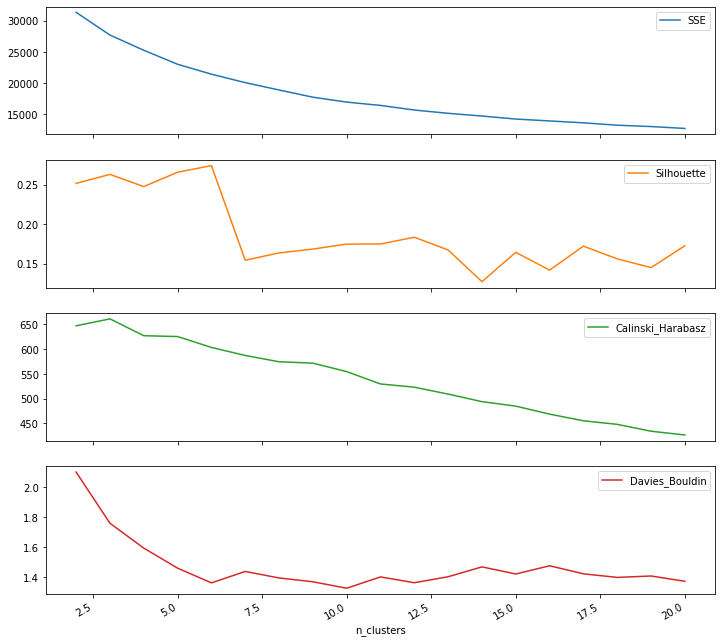

In [241]:
df_cluster_scorer.plot.line(subplots=True,x ='n_clusters', figsize=(12,12))

<AxesSubplot:xlabel='n_clusters'>

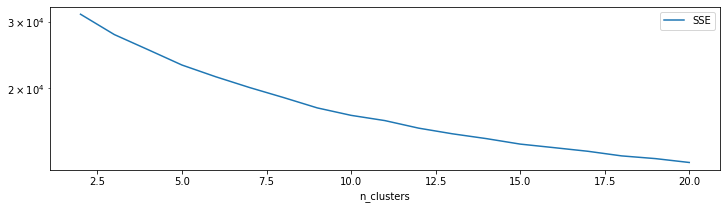

In [245]:
df_cluster_scorer.plot.line(y='SSE',x ='n_clusters',logy=True, figsize=(12,3))

#### Visualize the cluster

In [246]:
pca = PCA(n_components=2, whiten=True)

pca.fit(city_groups_std[num_list])

PCA(n_components=2, whiten=True)

In [247]:
pca.fit_transform(city_groups_std[num_list])

array([[ 0.09362892, -0.52372539],
       [ 0.84601865, -0.14918922],
       [ 3.82881756, -0.1731645 ],
       ...,
       [ 0.46338984,  1.53211431],
       [-0.97116177, -0.50927138],
       [ 1.16965175,  1.06541916]])

In [248]:
city_groups_std['x'], city_groups_std['y'] = zip(*(pca.fit_transform(city_groups_std[num_list])))

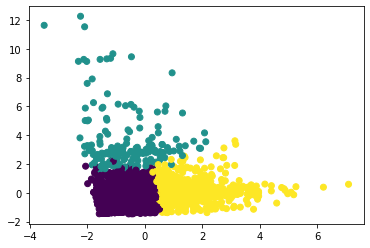

In [249]:
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()


In [257]:
df_cluster_scorer[df_cluster_scorer['n_clusters']==2]['model'].values[0]

KMeans(n_clusters=2)

In [261]:
@interact
def show_clusters(n=(2,20)):
    model = df_cluster_scorer[df_cluster_scorer['n_clusters']==n]['model'].values[0]
    labels = model.predict(city_groups_std[num_list])
    plt.scatter(city_groups_std['x'], city_groups_std['y'], c=labels)
    plt.title(f"Cluster {n}")
    plt.show()

interactive(children=(IntSlider(value=11, description='n', max=20, min=2), Output()), _dom_classes=('widget-in…

### Step4.  Profile the cluster

In [264]:
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean()

user_location_city  orig_destination_distance  is_mobile  is_package  \
cluster                                                                         
0              28059.919851                1390.514992   0.137752    0.184819   
1              31017.981928                1525.042593   0.115663    0.196687   
2              28893.937273                3189.285509   0.112741    0.487444   

         srch_adults_cnt  srch_children_cnt  srch_rm_cnt  duration  \
cluster                                                              
0               1.994703           0.377777     1.069875  2.794248   
1               4.084940           0.567671     2.412249  3.069378   
2               2.029138           0.321586     1.069821  5.300009   

         days_in_advance  
cluster                   
0              42.493643  
1              55.478239  
2             101.977415

### Step 5: assess the statistical robustness
A statistically robust segmentation return similar results using different clustering methodologies